In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mdf = pd.read_csv('data/meteorite-landings.csv')

In [3]:
mdf.sample(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
31478,Pecora Escarpment 82526,18289,Valid,H6,24.90,Found,1982.0,-85.66909,-68.15000,"(-85.669090, -68.150000)"
89,Beardsley,4984,Valid,H5,16000.00,Fell,1929.0,39.80000,-101.20000,"(39.800000, -101.200000)"
17453,Lake Torrens,12447,Valid,L6,906.00,Found,1989.0,-31.03333,138.20000,"(-31.033330, 138.200000)"
42354,Yamato 81012,29073,Valid,H5,380.65,Found,1981.0,-71.50000,35.66667,"(-71.500000, 35.666670)"
15865,Grove Mountains 090332,57378,Valid,H4,83.13,Found,2010.0,-72.82531,75.35544,"(-72.825310, 75.355440)"


In [4]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name           45716 non-null object
id             45716 non-null int64
nametype       45716 non-null object
recclass       45716 non-null object
mass           45585 non-null float64
fall           45716 non-null object
year           45428 non-null float64
reclat         38401 non-null float64
reclong        38401 non-null float64
GeoLocation    38401 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [5]:
(mdf.isnull().sum()/mdf.shape[0])*100

name            0.000000
id              0.000000
nametype        0.000000
recclass        0.000000
mass            0.286552
fall            0.000000
year            0.629976
reclat         16.000962
reclong        16.000962
GeoLocation    16.000962
dtype: float64

Lets understand and analyze indivudual columns one by one.

'name' and 'id' columns have no missing values. They are unique and have no bearing in clustering or classification of meteorites.

'nametype' has no missing values. It's categorical with only two options: 'valid' or 'relict'.

In [7]:
# 'recclass' variable : no missing values.

len(mdf['recclass'].unique())


466

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


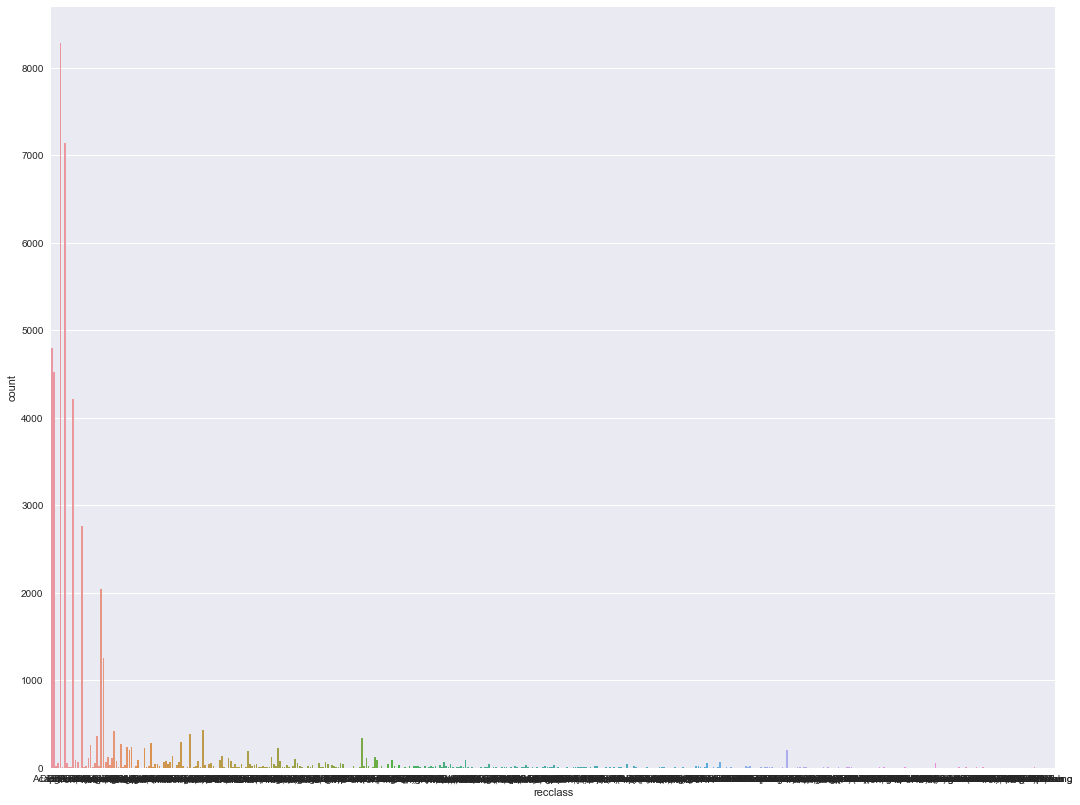

In [9]:
plt.figure(figsize=(18,14))
sns.countplot(mdf['recclass'])

In [10]:
mdf['recclass'].value_counts()[:10]

L6      8285
H5      7142
L5      4796
H6      4528
H4      4211
LL5     2766
LL6     2043
L4      1253
H4/5     428
CM2      416
Name: recclass, dtype: int64

More than two-third of meteorites belong to just few classes. Classes with instances fewer instances than a threshold value may be categorized under 'rare' category class.

'mass' has some missing values. Lets check its distribution.

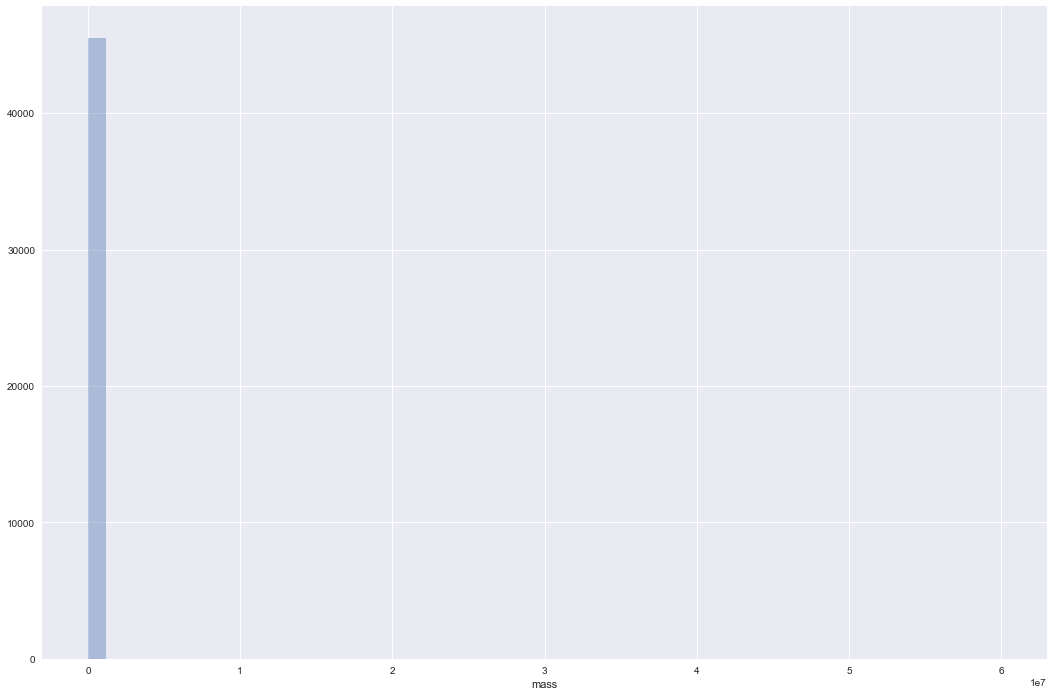

In [18]:
plt.figure(figsize=(18,12))
sns.distplot(mdf['mass'].dropna(), kde=False)

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


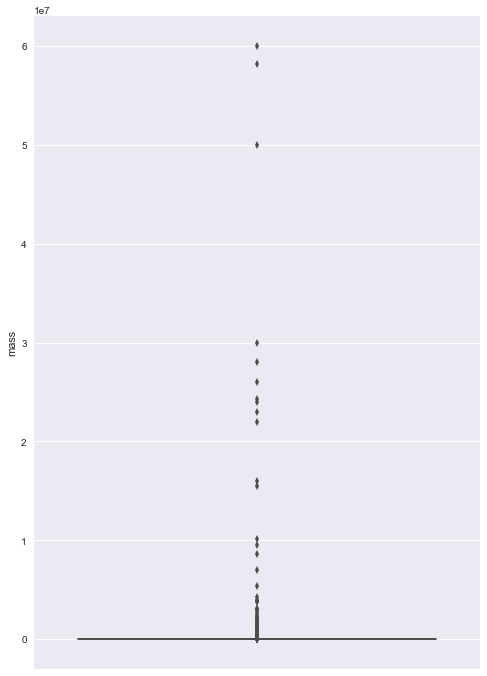

In [24]:
plt.figure(figsize=(8, 12))
sns.boxplot(y = mdf['mass'].dropna())

In [25]:
mdf['mass'].max()

60000000.0

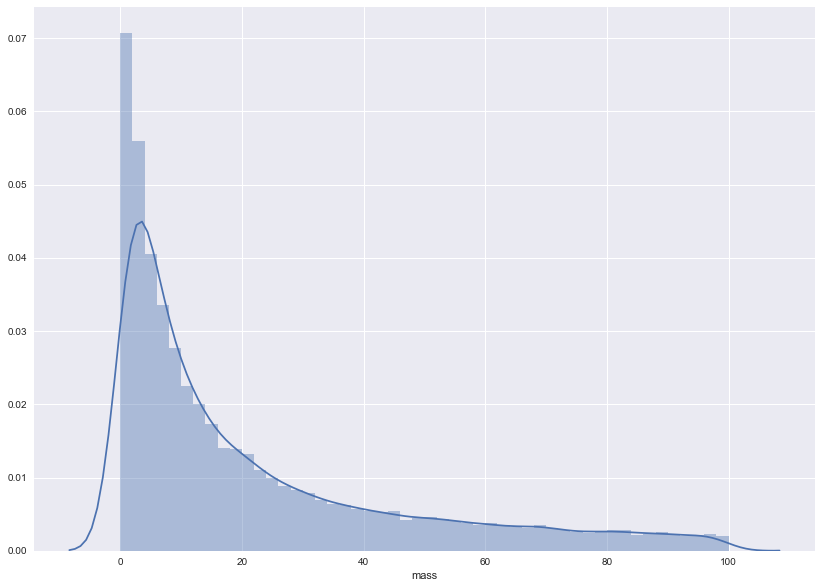

In [37]:
plt.figure(figsize=(14,10))
sns.distplot(mdf[mdf['mass'] < 100]['mass'])

In [49]:
mdf[mdf['mass'] < 1000]['mass'].shape[0]

40714

Lets decide whether to drop or impute 'mass' missing values after examining other variables. Others features might demonstrate strong correlation with 'mass' thus helping with imputation.

'fall' doesn't have any missing values. It is a straightforward categorical variable with no complexity.

'year' has few missing values. It also has some wrong entries as mentioned in kaggle documentation. Lets drop those rows from dataset.

In [51]:
mdf.dropna(axis=0, subset=['mass'], inplace=True)

In [56]:
# Drop rows with year before 860 or after 2016. They are wrong entries.
mdf[(mdf['year'] < 860) | (mdf['year'] > 2016)]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
30679,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.00000,0.0,"(0.000000, 0.000000)"
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601.0,49.41667,21.7,"(49.416670, 21.700000)"


In [57]:
# just two rows need to be dropped.
mdf = mdf[(mdf['year'] >= 860) | (mdf['year'] <= 2016)]

In [58]:
mdf.shape

(45311, 10)

'reclat' and 'reclong':
documentation says some values are mis-entered for these variables. Lets drop those rows along with reaminig missing values (in 'reclat', 'reclong' and 'mass')

In [75]:
mdf = mdf[(mdf['reclong'] <= 180) & (mdf['reclong'] >= -180) & ((mdf['reclat'] != 0) | (mdf['reclong'] != 0))]

In [76]:
mdf.shape

(31930, 10)

In [77]:
mdf.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

no missing values remaining.

In [80]:
mdf.to_csv('data/meteorite-cleaned.csv', index=False)

In [81]:
pd.read_csv('data/meteorite-cleaned.csv').head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
